In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter("ignore")

In [2]:

df = pd.read_csv("C:\\Users\\shubh\\OneDrive\\Desktop\\iNeubytes\\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Exploring the Dataset 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values so no need to process them.

In [38]:
df.skew()

age                                    -0.248866
sex                                    -0.851449
chest pain                              0.529455
resting blood pressure                  0.739768
chol                                    1.074073
fbs                                     1.971339
resting electrocardiographic results    0.180440
thalach                                -0.513777
exang                                   0.692655
oldpeak                                 1.210899
slope                                  -0.479134
ca                                      1.261189
thal                                   -0.524390
target                                 -0.052778
dtype: float64

there is no need of standardization as the skewness lies btw 0 to 1 only .

In [40]:
df.describe()

,age,sex,chest pain,resting blood pressure,chol,fbs,resting electrocardiographic results,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.rename(columns={'cp': 'chest pain', 'restecg': 'resting electrocardiographic results', 'trestbps': 'resting blood pressure'}, inplace=True) 
df

,age,sex,chest pain,resting blood pressure,chol,fbs,resting electrocardiographic results,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
unique_sorted = sorted(df['age'].unique())
unique_sorted

[29,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 74,
 76,
 77]

# DataVizualization.

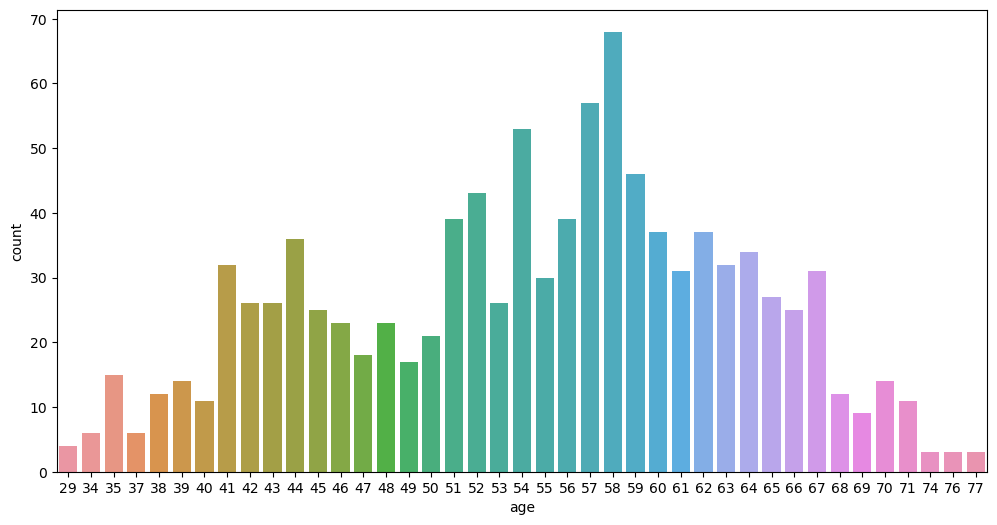

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(df["age"])
plt.show()

Above graph tells us that the Age between 50 to 68 has the more chances of heart attacks.

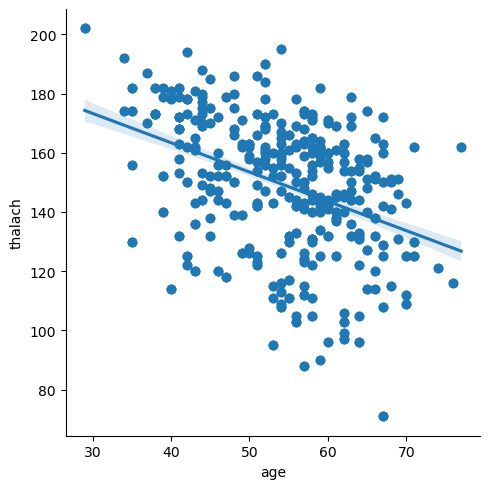

In [8]:
sns.lmplot(x="age", y="thalach", data=df)
plt.show()

Conclusion :- Maximum Heart Rate is Between 30 to 58 Age, which cross the Thalach limit from 180 to 200 . 

In [9]:
x = df['target'].value_counts()
print(x)

1    526
0    499
Name: target, dtype: int64


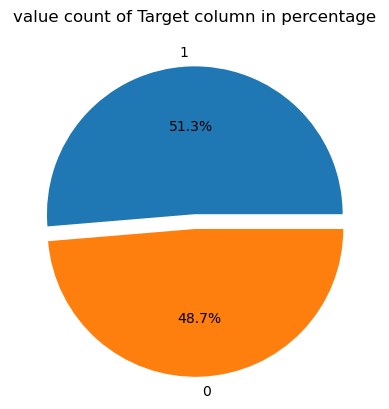

In [10]:
plt.pie(x, labels=x.index, autopct='%1.1f%%',explode=[0,0.1])

# Add title and ylabel
plt.title('value count of Target column in percentage')
plt.show()

Data of Target varibale is divided in over all same proportion.

# Modelling

In [12]:
X = df.drop("target",axis=1)
Y = df["target"]

In [13]:
X.shape

(1025, 13)

In [14]:
Y.shape

(1025,)

# Random Forest 

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [16]:
x_test.shape

(205, 13)

In [17]:
y_test.shape

(205,)

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(x_train,y_train)

#prediction 
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

#evaluation
from sklearn.metrics import accuracy_score

print("train R2:",accuracy_score(pred_train,y_train))
print("test R2",accuracy_score(pred_test,y_test))

#cross_validtion_score
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,X,Y)
score
print("cross validation score:",score.mean())

train R2: 1.0
test R2 1.0
cross validation score: 0.9941463414634146


In [19]:
model.feature_importances_

array([0.08672549, 0.04139999, 0.13851019, 0.07365606, 0.08708008,
       0.00820801, 0.02015943, 0.11630478, 0.05912375, 0.1147335 ,
       0.04537683, 0.10528773, 0.10343415])

In [20]:
df_2 =  pd.DataFrame(index = X.columns, data = model.feature_importances_, columns = ['Feature importance'])
df_2

,Feature importance
age,0.086725
sex,0.041400
chest pain,0.138510
resting blood pressure,0.073656
chol,0.087080
fbs,0.008208
resting electrocardiographic results,0.020159
thalach,0.116305
exang,0.059124
oldpeak,0.114734


In [21]:
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier(random_state = 0)
param_grid = {'n_estimators':list(range(1,101))}
grid = GridSearchCV(estimator,param_grid,scoring = 'accuracy',cv=5)

grid.fit(x_train,y_train)
grid.best_params_

{'n_estimators': 39}

#Again modelling after hyper parameter Tunning to increase the accuracy.

In [22]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(n_estimators=39,random_state=0)
model_1.fit(x_train,y_train)

#prediction 
pred_train = model_1.predict(x_train)
pred_test = model_1.predict(x_test)

#evaluation
from sklearn.metrics import accuracy_score

print("train R2:",accuracy_score(pred_train,y_train))
print("test R2",accuracy_score(pred_test,y_test))

#cross_validtion_score
from sklearn.model_selection import cross_val_score
score = cross_val_score(model_1,X,Y)
score
print("cross validation score:",score.mean())

train R2: 1.0
test R2 1.0
cross validation score: 0.9970731707317073


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_test)

array([[ 98,   0],
       [  0, 107]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier()
dt_default.fit(x_train,y_train)

#prediction
ypred_train = dt_default.predict(x_train)
y_pred_test =  dt_default.predict(x_test)

#evaluation
from sklearn.metrics import accuracy_score
print('train R2',accuracy_score(y_train,ypred_train))
print('test R2',accuracy_score(y_test,y_pred_test))

#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_default,X,Y,cv=5)
print(scores)
print(scores.mean())

train R2 1.0
test R2 1.0
[0.9804878  1.         0.98536585 1.         1.        ]
0.9931707317073171


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



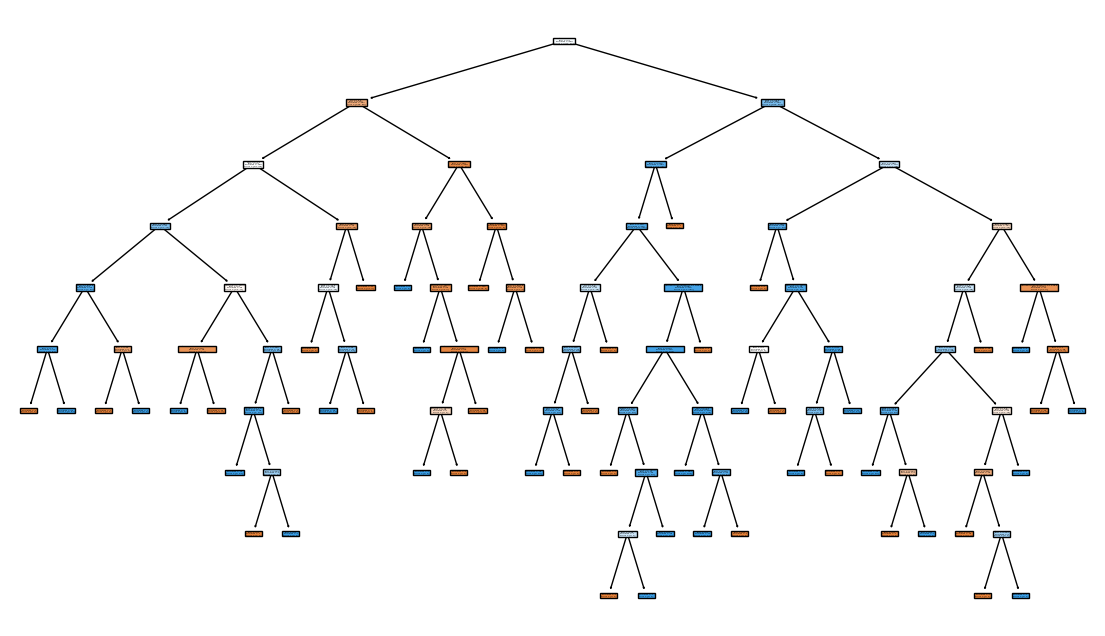

In [27]:
from sklearn.tree import plot_tree 
plt.figure(figsize=(14,8),dpi=100)
plot_tree(dt_default,filled=True,feature_names = X.columns)
plt.show()

In [28]:
dt_default.feature_importances_

array([0.10295753, 0.06744439, 0.26202089, 0.03996351, 0.06725985,
       0.01897042, 0.        , 0.07967578, 0.01758978, 0.10362789,
       0.00754488, 0.15243403, 0.08051106])

In [29]:
pd.DataFrame(index=X.columns,data=dt_default.feature_importances_,columns=['feature importances'])

,feature importances
age,0.102958
sex,0.067444
chest pain,0.262021
resting blood pressure,0.039964
chol,0.067260
fbs,0.018970
resting electrocardiographic results,0.000000
thalach,0.079676
exang,0.017590
oldpeak,0.103628


# Support vector mechanism

In [30]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

#prediction
ypred_train = model.predict(x_train)
ypred_test =  model.predict(x_test)

#evaluation
from sklearn.metrics import accuracy_score
print('train R2',accuracy_score(y_train,ypred_train))
print('test R2',accuracy_score(y_test,ypred_test))

train R2 0.7024390243902439
test R2 0.7463414634146341


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72        98
           1       0.73      0.81      0.77       107

    accuracy                           0.75       205
   macro avg       0.75      0.74      0.74       205
weighted avg       0.75      0.75      0.74       205



In [32]:
import pandas as pd

models = ["Random Forest", "Decision Tree", "Supoort vector Mechanism",]
accuracy_scores = [0.9941, 1.0, 0.75]
precision_scores = [1.0,1.0,0.77]
recall_scores = [1.0,1.0,0.67,]
f1_scores = [0.72,0.97,0.72,]

evaluation = pd.DataFrame({'Models': models, 'Accuracy': accuracy_scores, 'Precision': precision_scores,
                           'Recall': recall_scores, 'F1-score': f1_scores})

print(evaluation)

                     Models  Accuracy  Precision  Recall  F1-score
0             Random Forest    0.9941       1.00    1.00      0.72
1             Decision Tree    1.0000       1.00    1.00      0.97
2  Supoort vector Mechanism    0.7500       0.77    0.67      0.72


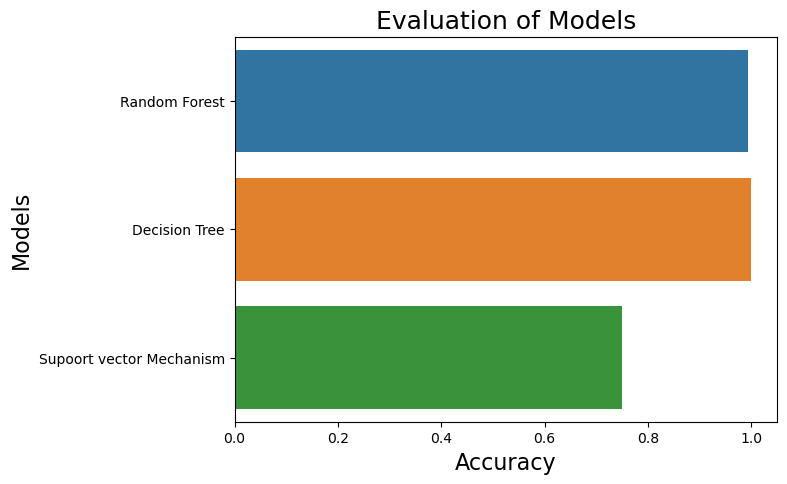

In [33]:
evaluation = pd.DataFrame({'Models': models, 'Accuracy': accuracy_scores})

plt.figure(figsize=(7, 5))

sns.barplot(x='Accuracy', y='Models', data=evaluation)

plt.xlabel('Accuracy', fontdict={'fontsize': 16})
plt.ylabel('Models', fontdict={'fontsize': 16})
plt.title('Evaluation of Models', fontdict={'fontsize': 18})

plt.show()

# From above all 3 model Decision Tree is showing highest accuracy followed by Random Forest Algorithmn  with no overfitting . so we choose Decision Tree model for predicting Heart Attack.

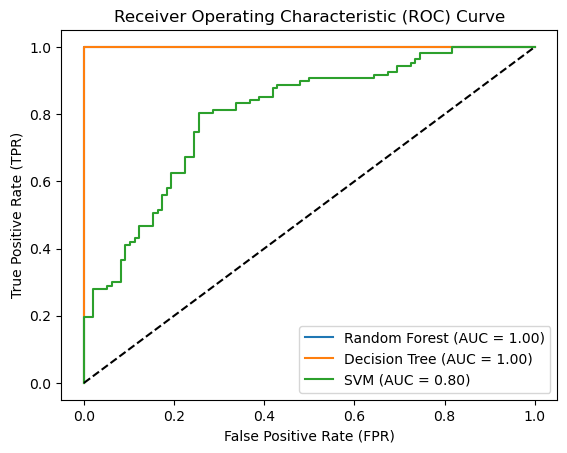

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

# Assuming you have the models 'model', 'dt_default', 'model_1', and the test data x_test, y_test

# Create a figure and axes
fig, ax = plt.subplots()

# Plot ROC curve for the first model
plot_roc_curve(model_1, x_test, y_test, ax=ax, name='Random Forest')

# Plot ROC curve for the second model
plot_roc_curve(dt_default, x_test, y_test, ax=ax, name='Decision Tree')

# Plot ROC curve for the third model
plot_roc_curve(model, x_test, y_test, ax=ax, name='SVM')

# Add a diagonal line for random guess
ax.plot([0, 1], [0, 1], linestyle='--', color='black')

# Set labels and title
ax.set_xlabel('False Positive Rate (FPR)')
ax.set_ylabel('True Positive Rate (TPR)')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')

# Show the plot
plt.show()


From interpreting ROC - AUC graph we get the insight that Random Forest and Decision Tree are performing good as compared to SVM .